<a href="https://colab.research.google.com/github/hallinearaujo/aula02MachineLearning/blob/main/Parte_2_Modelos_de_Classifica%C3%A7%C3%A3o_e_Dados_Risco_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# AV1 PARTE 2: Modelos de Classificação e Dados - DataSet credit_risk
# Autor: Halline Araújo
# Data: 23/04/2023

In [1]:
#Conjunto de importacoes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
#Carrega o dataset com os dados para o treinamento e validacao
risco_de_credito= pd.read_csv("credit_risk_dataset.csv", encoding="utf-8")

In [84]:
#Definição dos atributos que deverao ser treinados para gerar o modelo de classificacao:
#idade (person_age), renda (person_income), renda percentual do emprestimo (loan_percent_income), história de crédito (cb_person_cred_hist_length)
data_treino = np.array(risco_de_credito[['person_age', 'person_income', 'loan_percent_income', 'cb_person_cred_hist_length']])
#Definição do atributo de classificacao
data_classif = np.array(risco_de_credito['loan_status'])

In [85]:
# Verificando o formato dos dados
risco_de_credito.shape

(32581, 12)

In [86]:
# Verificando as primeiras linhas do dataset
risco_de_credito.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [87]:
# Verificando as últimas linhas do dataset
risco_de_credito.tail(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [88]:
# Identificando a correlação entre as variáveis (Correlação não implica causalidade)
def plot_corr(risco_de_credito, size=10):
    corr = risco_de_credito.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

<ipython-input-88-2ddc2cea602b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = risco_de_credito.corr()


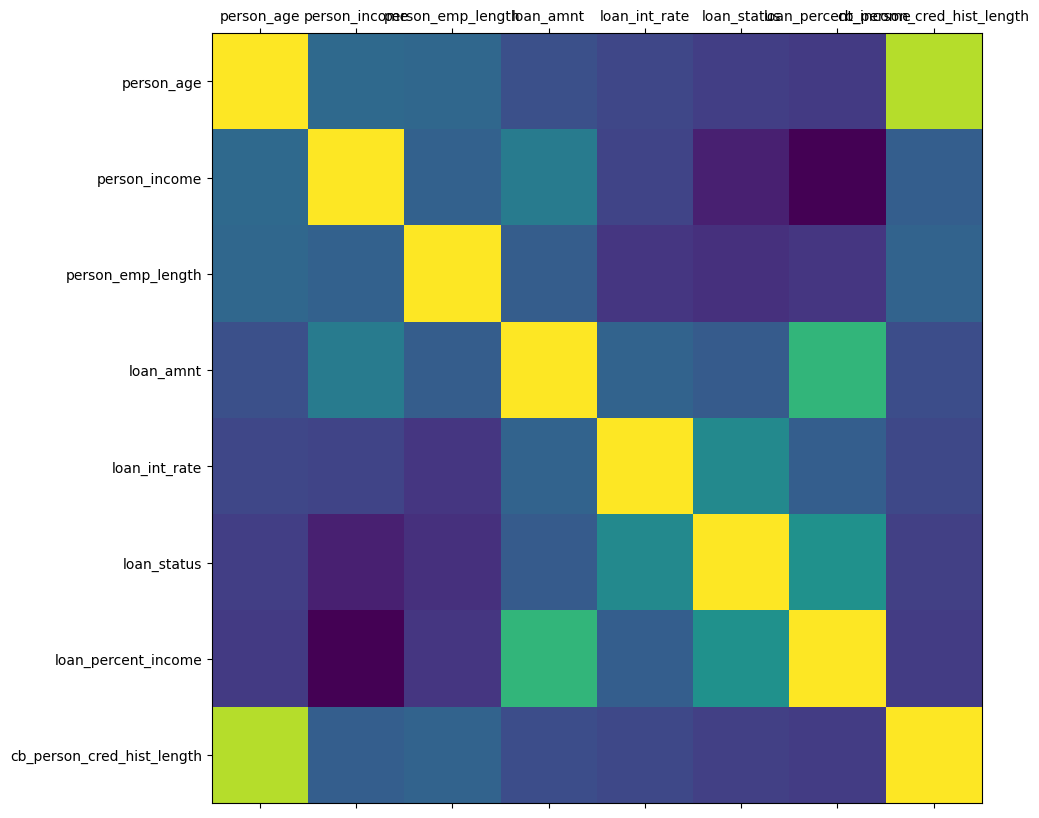

In [89]:
# Criando o gráfico
plot_corr(risco_de_credito)

In [90]:
# Spliting = 70% para dados de treino e 30% para dados de teste
#Definição dos conjuntos de treinamento e validação
x_treino, x_val, y_treino, y_val = train_test_split(data_treino, data_classif, test_size=0.30)

In [91]:
#Apresentacao dos dados selecionados para o conjunto de treinamento e validacao
print("-----------------------")
print("Conjunto de Treinamento")
print(x_treino)
print("Conjunto de Validacao")
print(x_val)
print("-----------------------")

-----------------------
Conjunto de Treinamento
[[2.9000e+01 2.9496e+04 2.0000e-01 8.0000e+00]
 [2.3000e+01 8.6500e+04 1.6000e-01 3.0000e+00]
 [2.6000e+01 1.4400e+05 8.0000e-02 3.0000e+00]
 ...
 [2.4000e+01 1.0000e+05 7.0000e-02 3.0000e+00]
 [2.5000e+01 4.9244e+04 1.6000e-01 3.0000e+00]
 [2.6000e+01 5.8900e+04 1.1000e-01 3.0000e+00]]
Conjunto de Validacao
[[2.800e+01 1.440e+05 2.100e-01 5.000e+00]
 [2.400e+01 6.500e+04 2.200e-01 4.000e+00]
 [2.200e+01 3.456e+04 6.000e-02 3.000e+00]
 ...
 [3.100e+01 3.500e+04 1.700e-01 7.000e+00]
 [2.400e+01 4.200e+04 1.700e-01 3.000e+00]
 [2.200e+01 3.600e+04 1.400e-01 4.000e+00]]
-----------------------


In [92]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(x_treino)/len(risco_de_credito.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(x_val)/len(risco_de_credito.index)) * 100))

70.00% nos dados de treino
30.00% nos dados de teste


In [93]:
# - Aplicando o Algoritmo com o Naive Bayes - GaussianNB.
#Treinamento do modelo com os dados atribuidos ao conjunto de treinamento
modelo_NB = GaussianNB()
modelo_NB.fit(x_treino, y_treino)

GaussianNB()

In [94]:
#Predição e acurácia para o conjunto de treinamento
print("Predicao para o conjunto de treinamento")
y_pred_treino = modelo_NB.predict(x_treino)
print("Acuracia para o conjunto de treinamento")
print(accuracy_score(y_treino, y_pred_treino))
print("Na Base de Treinamento")

Predicao para o conjunto de treinamento
Acuracia para o conjunto de treinamento
0.7835218802069631
Na Base de Treinamento


In [95]:
#Predição e acurácia para o conjunto de validação
print("Predicao para o conjunto de validacao")
y_pred_val = modelo_NB.predict(x_val)
print("Acuracia para o conjunto de validacao")
print(accuracy_score(y_val, y_pred_val))
print("na Base de Teste e ou Validação")

Predicao para o conjunto de validacao
Acuracia para o conjunto de validacao
0.7779028132992327
na Base de Teste e ou Validação


In [96]:
from sklearn import metrics

In [97]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, y_pred_val, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, y_pred_val, labels = [1, 0]))

Confusion Matrix
[[   0 2171]
 [   0 7604]]

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2171
           0       0.78      1.00      0.88      7604

    accuracy                           0.78      9775
   macro avg       0.39      0.50      0.44      9775
weighted avg       0.61      0.78      0.68      9775



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
# Criando uma Curva Roc
print("Roc Curve")

Roc Curve


In [99]:
# Otimizando o modelo com RandomForest
#Realizando operações com mais de um Algoritmo de Machine Learning (Classificação)

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
modelo_v2 = RandomForestClassifier(random_state = 42)
modelo_v2.fit(x_treino, y_treino.ravel())

RandomForestClassifier(random_state=42)

In [102]:
# Verificando os dados de treino
rf_predict_train = modelo_v2.predict(x_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_treino, rf_predict_train)))

Exatidão (Accuracy): 0.9896


In [103]:
# Verificando nos dados de teste
rf_predict_test = modelo_v2.predict(x_val)
print("Exatidão (Accuracy): na Base de Teste {0:.4f}".format(metrics.accuracy_score(y_val, rf_predict_test)))
print()

Exatidão (Accuracy): na Base de Teste 0.8287



In [104]:
# Validação do Modelo com a Matrix de Confusão
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, rf_predict_test, labels = [1, 0]))

Confusion Matrix
[[1018 1153]
 [ 521 7083]]

Classification Report
              precision    recall  f1-score   support

           1       0.66      0.47      0.55      2171
           0       0.86      0.93      0.89      7604

    accuracy                           0.83      9775
   macro avg       0.76      0.70      0.72      9775
weighted avg       0.82      0.83      0.82      9775



In [105]:
# Regressão Logística
# Terceiro Algorítmo de Machine Learning de Classificação de Dados

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
# Terceira versão do modelo usando Regressão Logística
modelo_v3 = LogisticRegression(C = 0.7, random_state = 42)
modelo_v3.fit(x_treino, y_treino.ravel())
lr_predict_test = modelo_v3.predict(x_val)

In [108]:
print("Exatidão (Accuracy): na Base de Teste {0:.4f}".format(metrics.accuracy_score(y_val, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(y_val, lr_predict_test, labels = [1, 0]))

Exatidão (Accuracy): na Base de Teste 0.7779

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2171
           0       0.78      1.00      0.88      7604

    accuracy                           0.78      9775
   macro avg       0.39      0.50      0.44      9775
weighted avg       0.61      0.78      0.68      9775



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
### Resumindo
## Exatidão nos dados Risco de Crédito

# Modelo usando algoritmo Naive Bayes         = 78%
# Modelo usando algoritmo Random Forest       = 98% 
# Modelo usando algoritmo Regressão Logística = 77% 
